# **1. Perkenalan Dataset**




 ### Dataset ini berisi berbagai indikator kesehatan dan faktor risiko yang berkaitan dengan penyakit jantung. Parameter seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, kebiasaan merokok, serta pola aktivitas fisik dikumpulkan untuk menganalisis risiko penyakit jantung dan mendukung penelitian di bidang kesehatan. Dataset ini dapat digunakan oleh tenaga kesehatan, peneliti, dan analis data untuk mengkaji tren penyakit jantung, mengidentifikasi faktor-faktor risiko, serta melakukan berbagai analisis yang berkaitan dengan kesehatan. Dataset ini saya peroleh dari Kaggle.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [45]:
#Type your code here
df = pd.read_csv('heart_disease_raw.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [46]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
count,9971.000000,9981,9981.000000,9970.000000,9975,9975,9979,9970,9978.000000,9974,...,9974,7414,9978,9975.000000,9970,9974.000000,9978.000000,9974.000000,9980.000000,10000
unique,NaN,2,NaN,NaN,3,2,2,2,NaN,2,...,2,3,3,NaN,3,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,High,Yes,No,No,NaN,Yes,...,No,Medium,Medium,NaN,Low,NaN,NaN,NaN,NaN,No
freq,NaN,5003,NaN,NaN,3372,5123,5004,5018,NaN,5022,...,5036,2500,3387,NaN,3390,NaN,NaN,NaN,NaN,8000
mean,49.296259,NaN,149.757740,225.425577,NaN,NaN,NaN,NaN,29.077269,NaN,...,NaN,NaN,NaN,6.991329,NaN,250.734409,120.142213,7.472201,12.456271,NaN
std,18.193970,NaN,17.572969,43.575809,NaN,NaN,NaN,NaN,6.307098,NaN,...,NaN,NaN,NaN,1.753195,NaN,87.067226,23.584011,4.340248,4.323426,NaN
min,18.000000,NaN,120.000000,150.000000,NaN,NaN,NaN,NaN,18.002837,NaN,...,NaN,NaN,NaN,4.000605,NaN,100.000000,80.000000,0.003647,5.000236,NaN
25%,34.000000,NaN,134.000000,187.000000,NaN,NaN,NaN,NaN,23.658075,NaN,...,NaN,NaN,NaN,5.449866,NaN,176.000000,99.000000,3.674126,8.723334,NaN
50%,49.000000,NaN,150.000000,226.000000,NaN,NaN,NaN,NaN,29.079492,NaN,...,NaN,NaN,NaN,7.003252,NaN,250.000000,120.000000,7.472164,12.409395,NaN
75%,65.000000,NaN,165.000000,263.000000,NaN,NaN,NaN,NaN,34.520015,NaN,...,NaN,NaN,NaN,8.531577,NaN,326.000000,141.000000,11.255592,16.140564,NaN


In [47]:
df.columns
df.dtypes

,0
Age,float64
Gender,object
Blood Pressure,float64
Cholesterol Level,float64
Exercise Habits,object
Smoking,object
Family Heart Disease,object
Diabetes,object
BMI,float64
High Blood Pressure,object


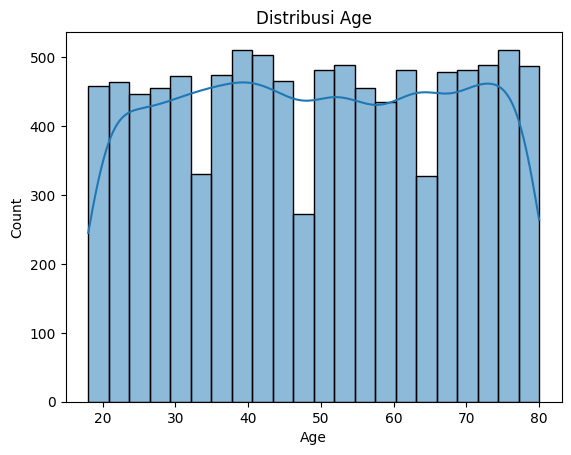

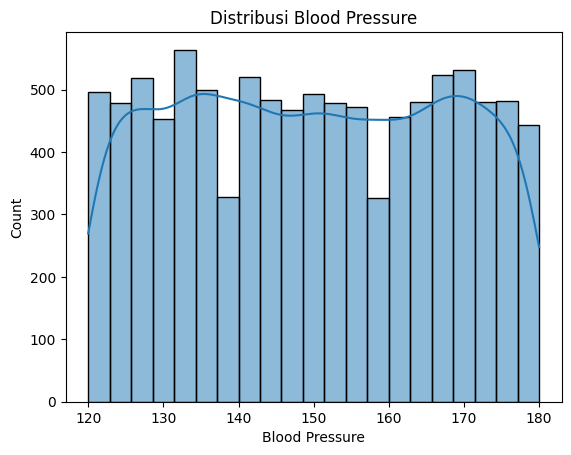

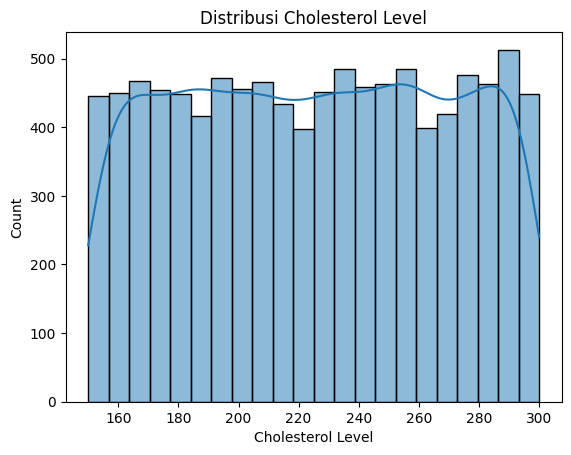

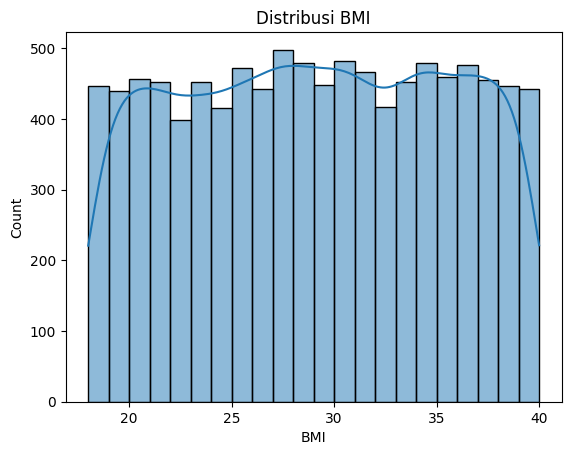

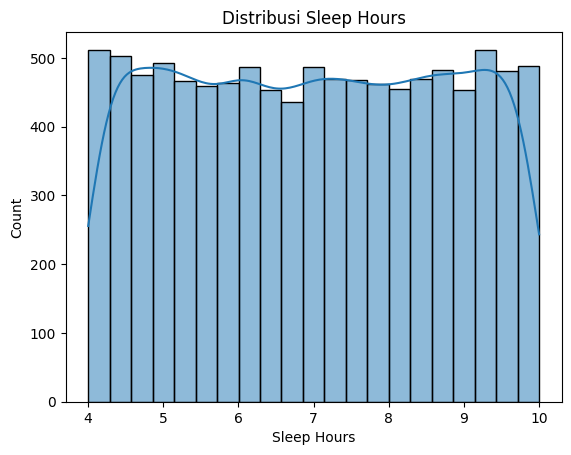

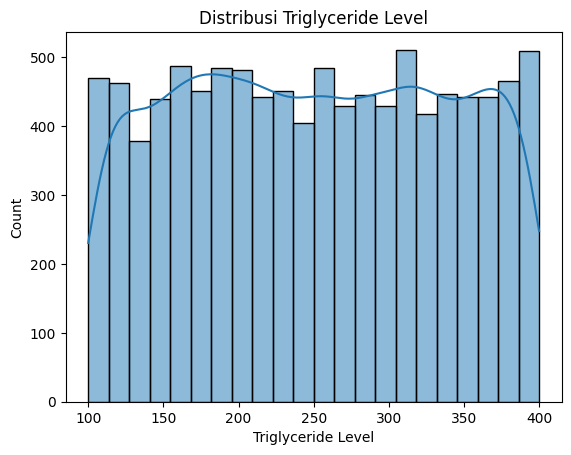

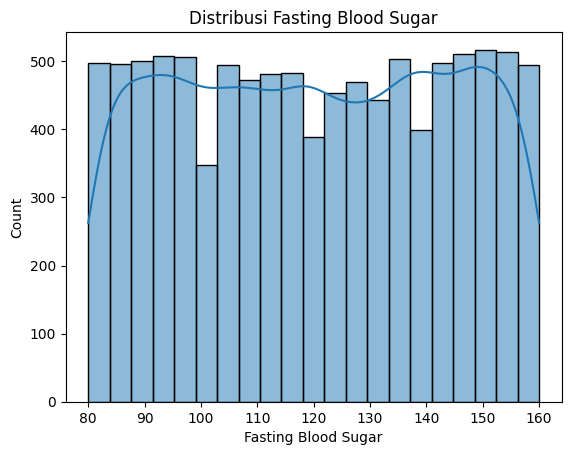

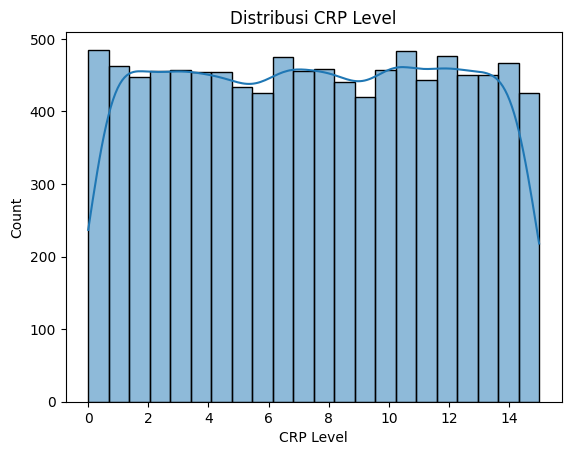

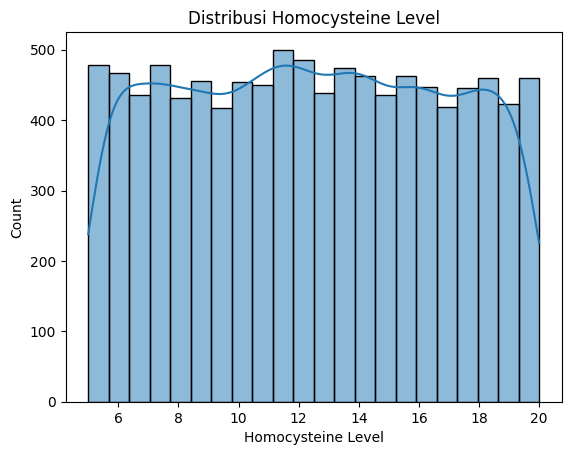

In [48]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

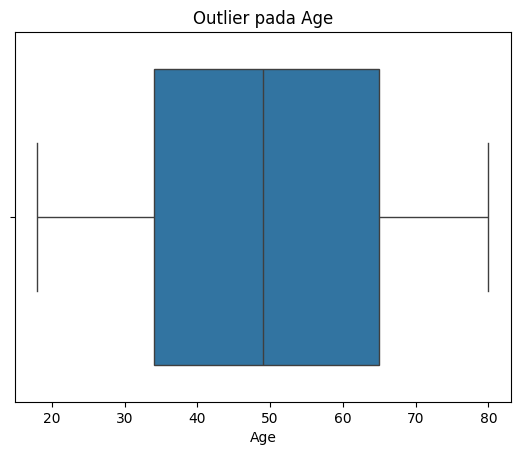

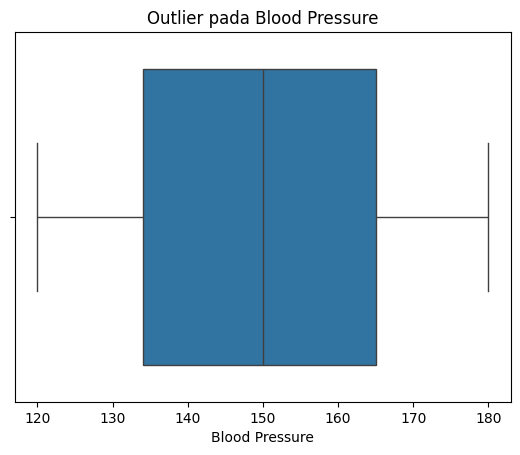

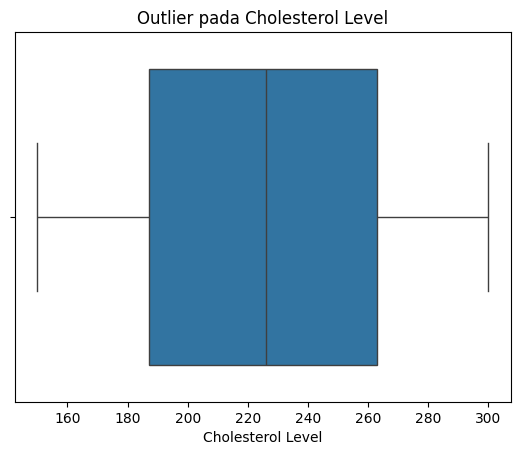

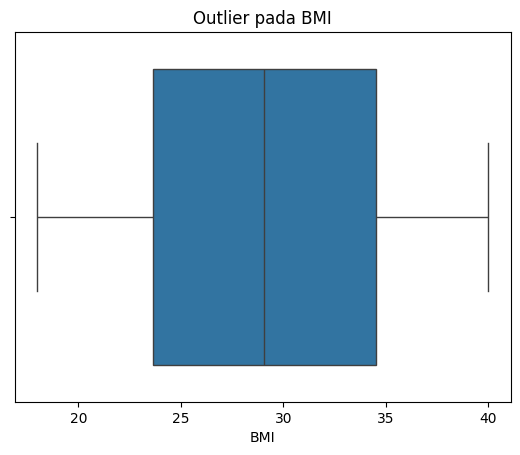

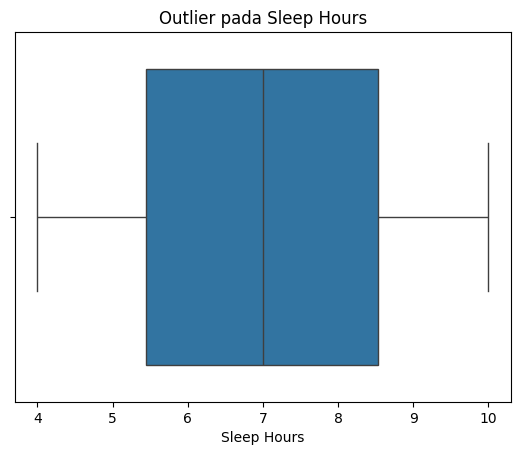

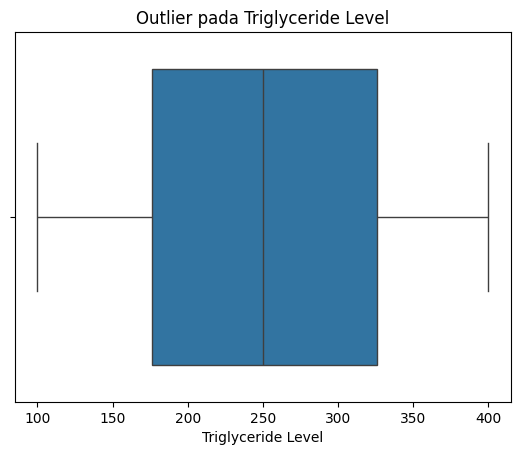

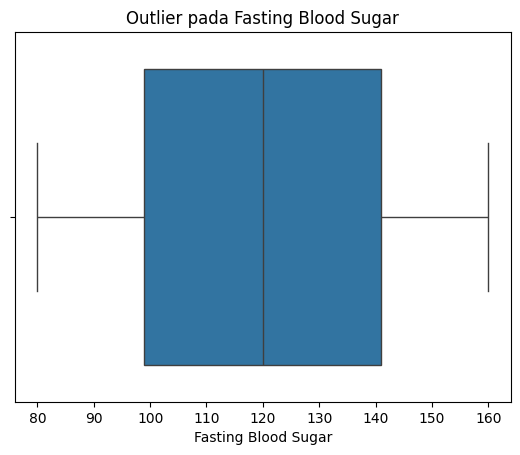

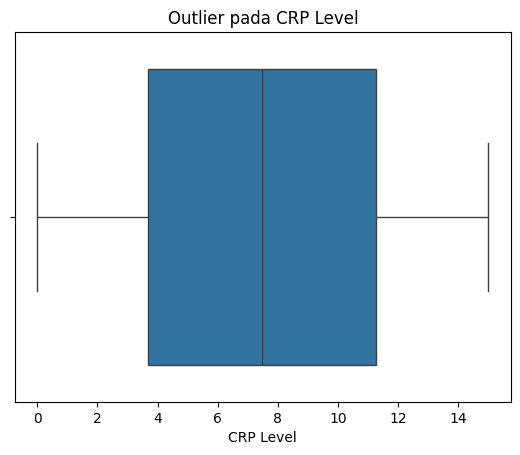

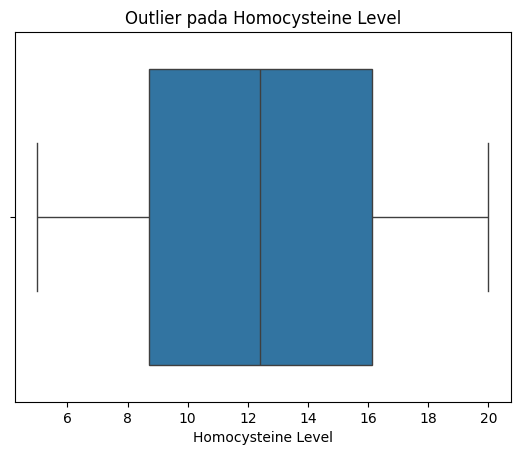

In [49]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outlier pada {col}")
    plt.show()

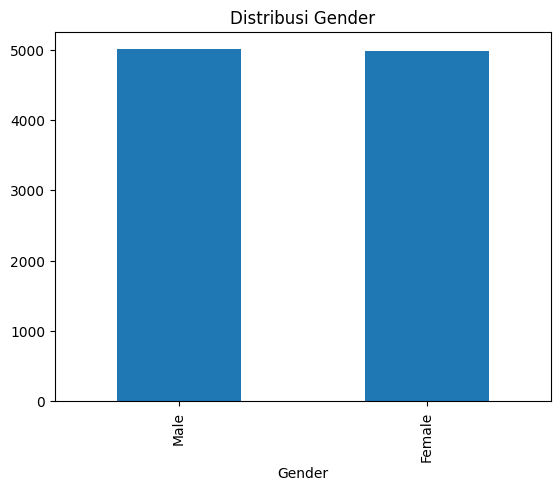

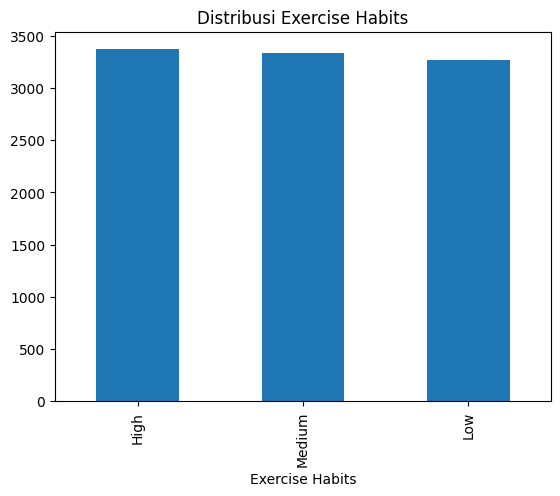

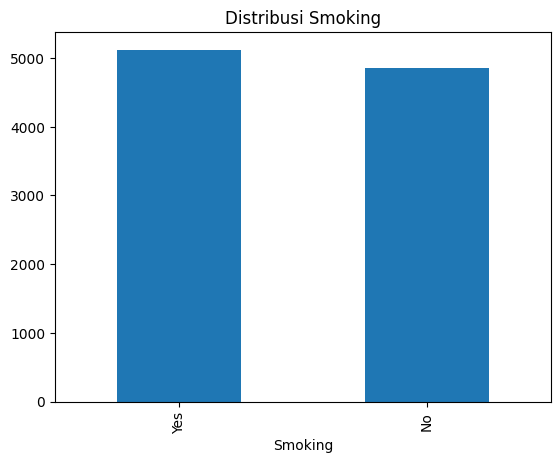

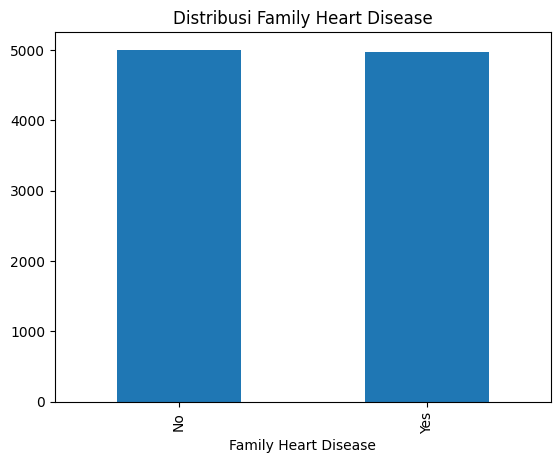

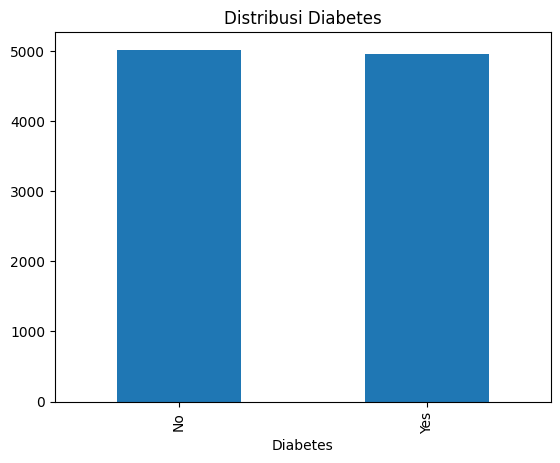

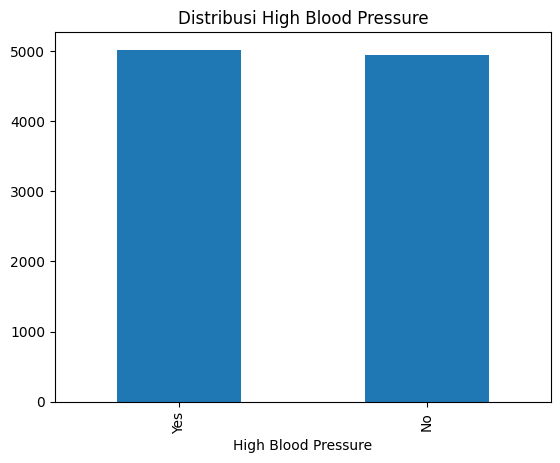

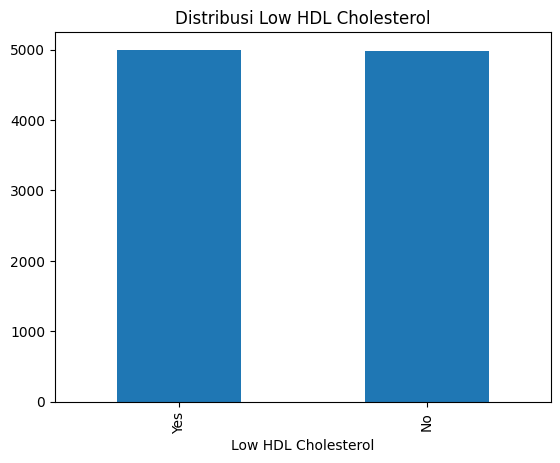

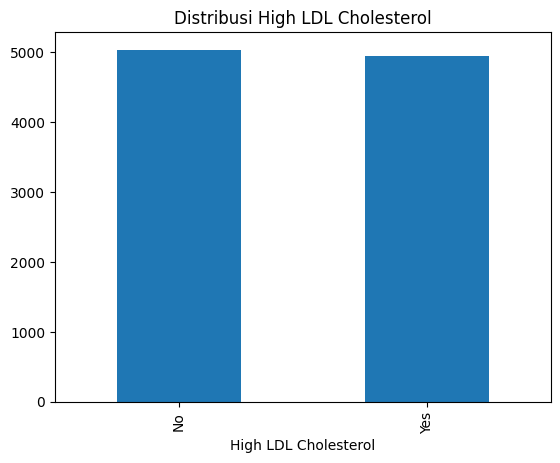

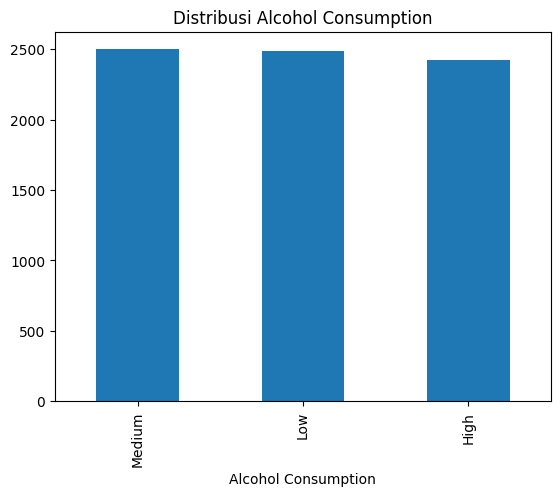

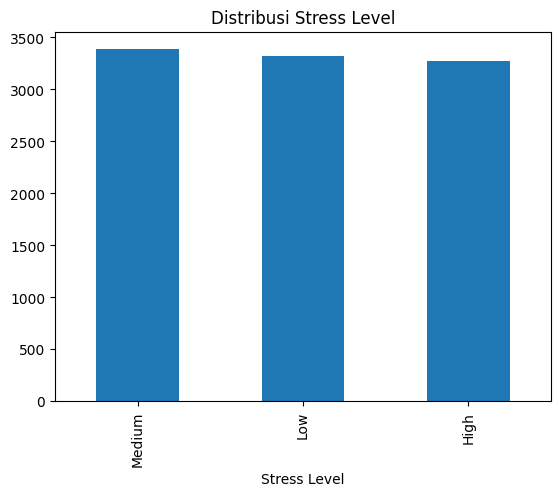

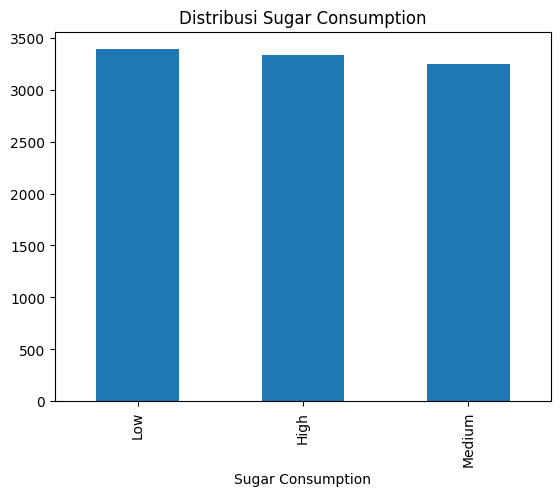

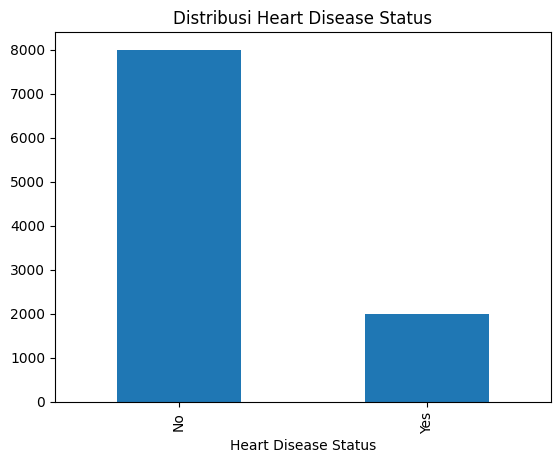

In [50]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribusi {col}")
    plt.show()

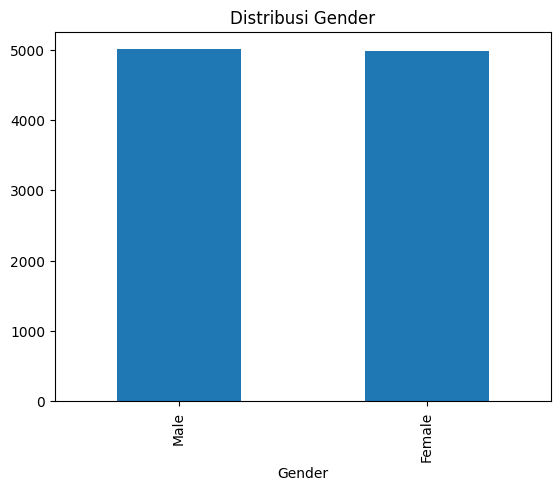

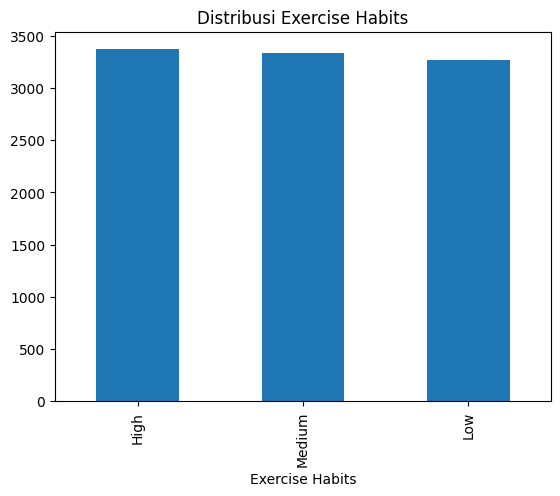

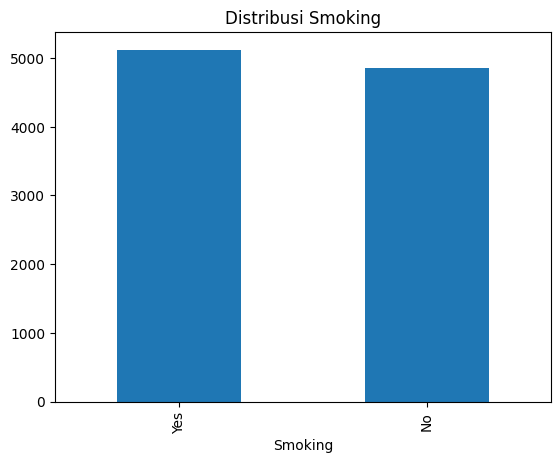

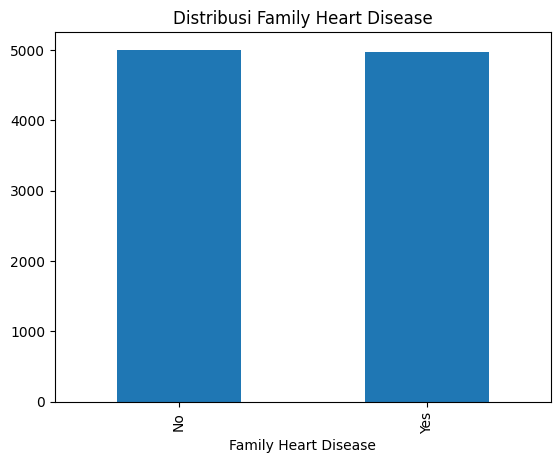

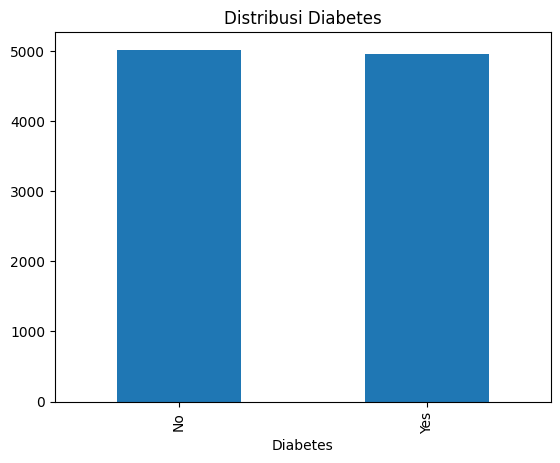

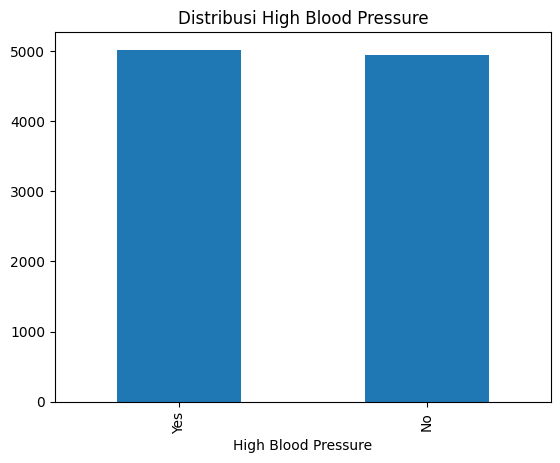

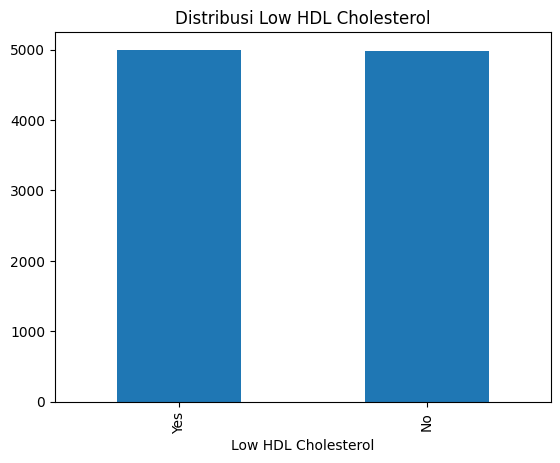

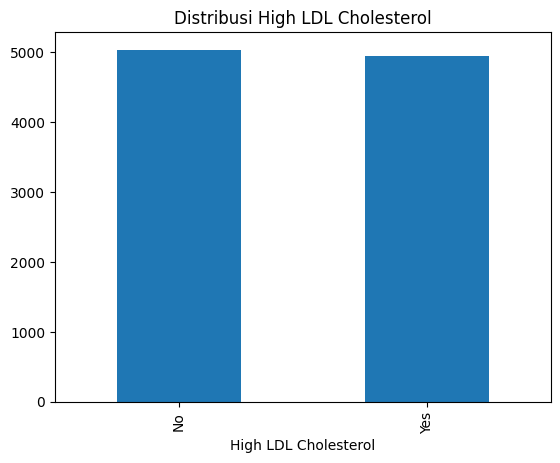

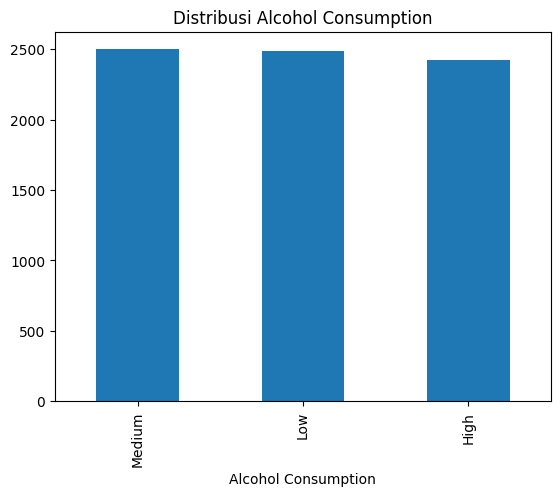

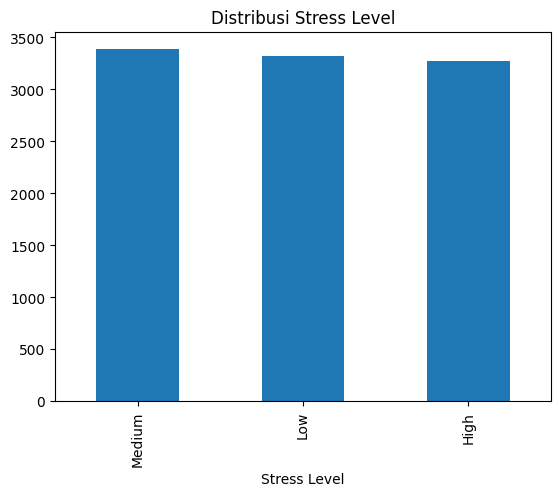

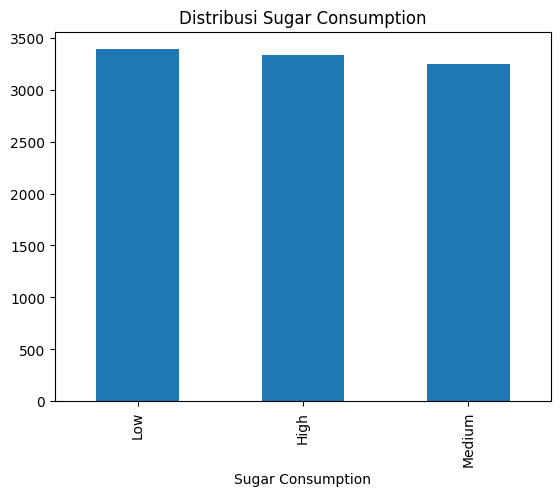

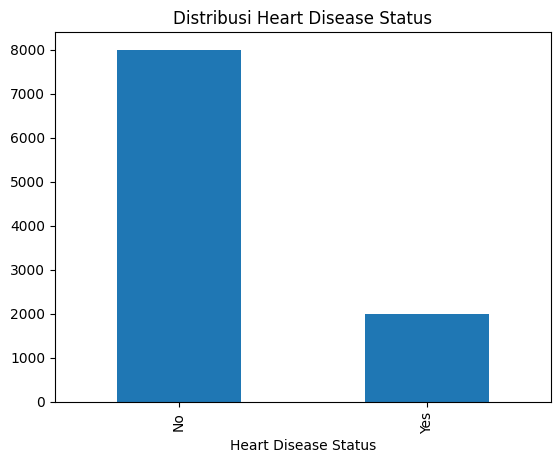

In [51]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribusi {col}")
    plt.show()

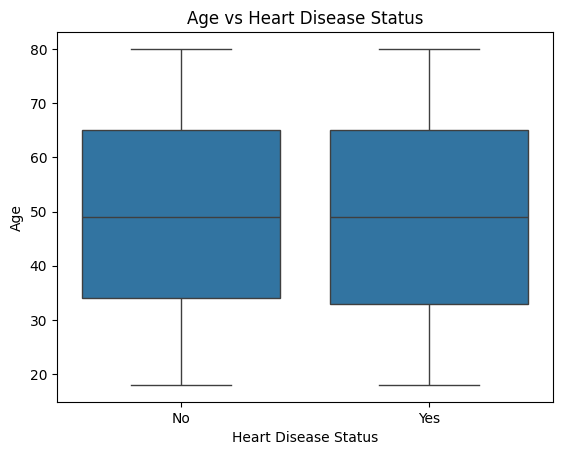

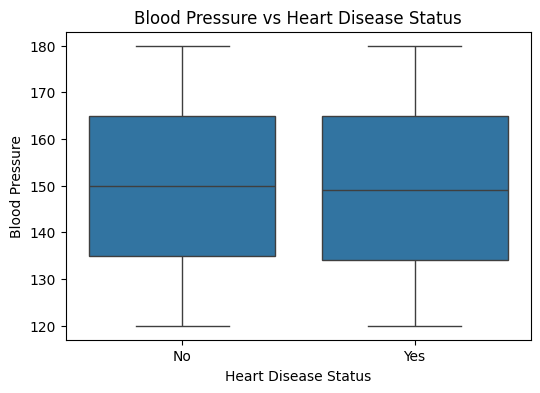

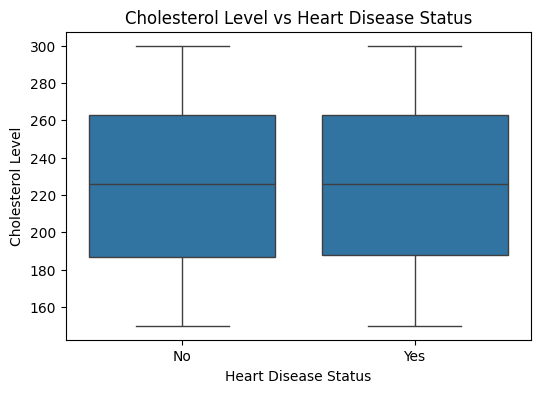

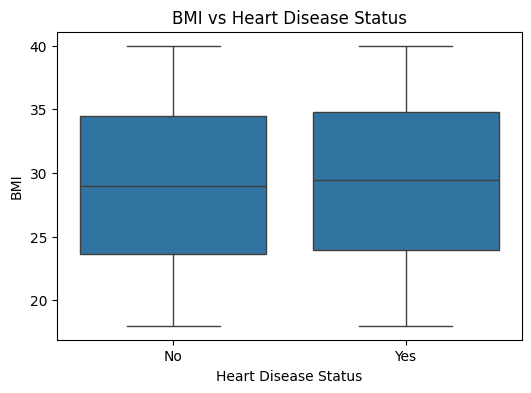

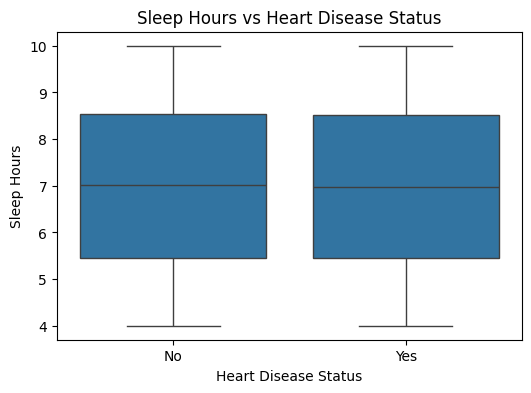

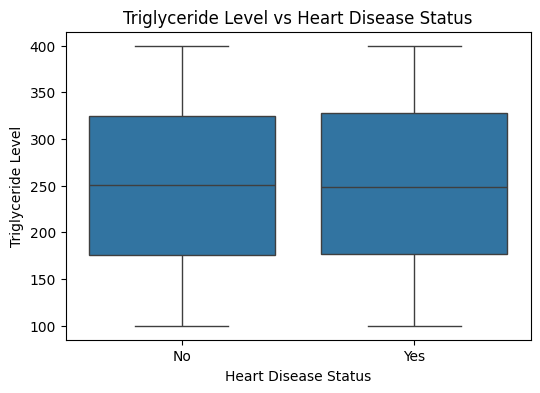

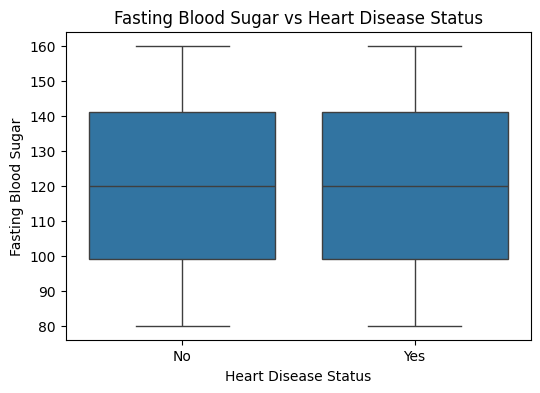

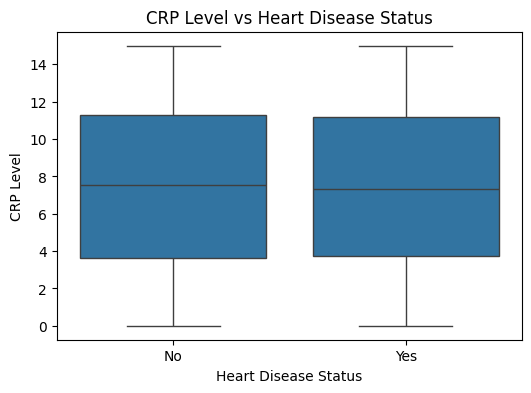

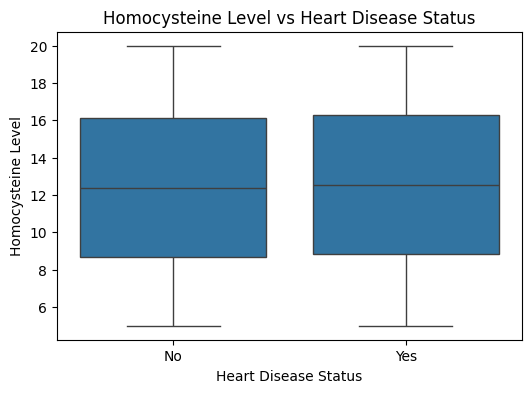

<Figure size 600x400 with 0 Axes>

In [52]:
target = "Heart Disease Status"
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f"{col} vs {target}")
    plt.show()
    plt.figure(figsize=(6, 4))

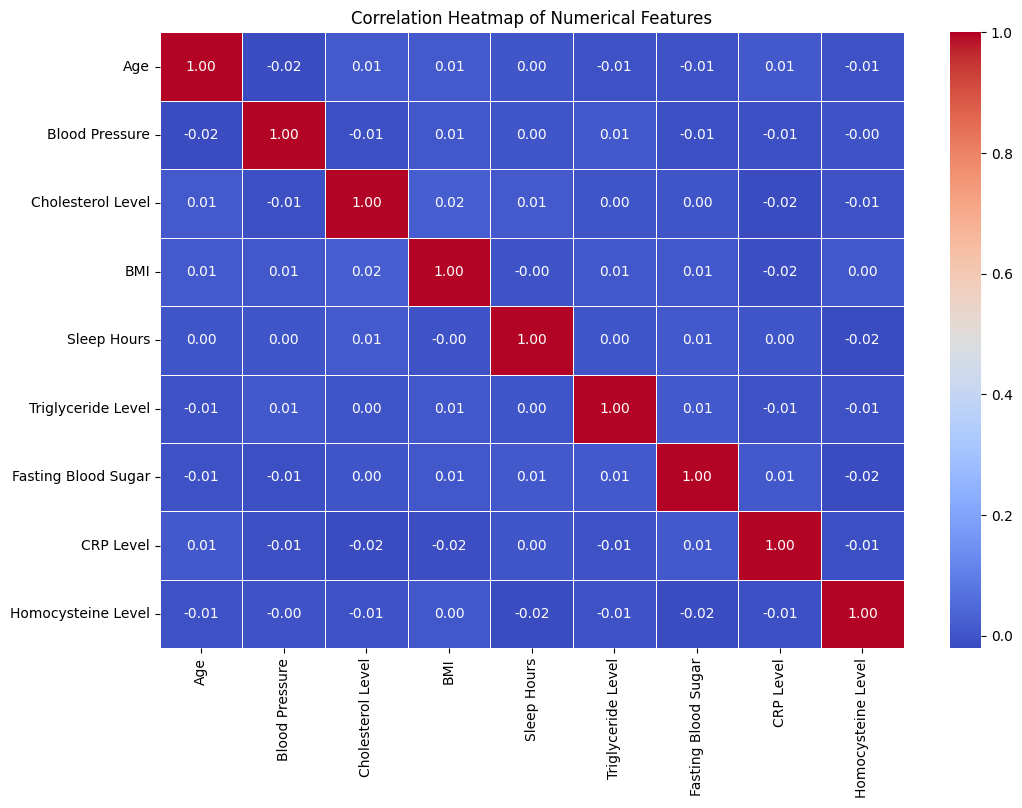

In [53]:
num_cols = df.select_dtypes(include="number").columns
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [54]:
# Missing Values
# kolom numerik & kategorikal
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

# numerik → median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# kategorikal → modus
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [55]:
# cek duplikasi
df.duplicated().sum()

# hapus duplikat
df = df.drop_duplicates()

In [56]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

for col in num_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower, upper)


In [57]:
df["Age_Bin"] = pd.qcut(
    df["Age"],
    q=3,
    labels=["Low", "Medium", "High"]
)
df["Age_Bin"] = df["Age_Bin"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

In [58]:
df["Heart Disease Status"] = df["Heart Disease Status"].map({
    "No": 0,
    "Yes": 1
})

In [59]:
target = "Heart Disease Status"
X = df.drop(columns=[target])
y = df[target]

In [60]:
le_target = LabelEncoder()
y = le_target.fit_transform(y)

In [61]:
num_cols = X.select_dtypes(include="number").columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [62]:
encoder = LabelEncoder()
cat_cols = X.select_dtypes(include="object").columns

for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

In [63]:
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [64]:
print(df.dtypes)

Age                      float64
Gender                     int64
Blood Pressure           float64
Cholesterol Level        float64
Exercise Habits            int64
Smoking                    int64
Family Heart Disease       int64
Diabetes                   int64
BMI                      float64
High Blood Pressure        int64
Low HDL Cholesterol        int64
High LDL Cholesterol       int64
Alcohol Consumption        int64
Stress Level               int64
Sleep Hours              float64
Sugar Consumption          int64
Triglyceride Level       float64
Fasting Blood Sugar      float64
CRP Level                float64
Homocysteine Level       float64
Heart Disease Status       int64
Age_Bin                 category
dtype: object


In [66]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   10000 non-null  float64 
 1   Gender                10000 non-null  int64   
 2   Blood Pressure        10000 non-null  float64 
 3   Cholesterol Level     10000 non-null  float64 
 4   Exercise Habits       10000 non-null  int64   
 5   Smoking               10000 non-null  int64   
 6   Family Heart Disease  10000 non-null  int64   
 7   Diabetes              10000 non-null  int64   
 8   BMI                   10000 non-null  float64 
 9   High Blood Pressure   10000 non-null  int64   
 10  Low HDL Cholesterol   10000 non-null  int64   
 11  High LDL Cholesterol  10000 non-null  int64   
 12  Alcohol Consumption   10000 non-null  int64   
 13  Stress Level          10000 non-null  int64   
 14  Sleep Hours           10000 non-null  float64 
 15  Sug

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,Age_Bin
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3439.0
mean,49.295400,0.50220,149.758200,225.427300,0.99350,0.514800,0.497500,0.495200,29.077274,0.504800,...,1.266000,1.013800,6.991359,0.992000,250.732500,120.141900,7.472200,12.456177,0.20000,NaN
std,18.167574,0.50002,17.556268,43.510401,0.82032,0.499806,0.500019,0.500002,6.300156,0.500002,...,0.824932,0.817237,1.751002,0.811173,86.953962,23.558053,4.334601,4.319100,0.40002,NaN
min,18.000000,0.00000,120.000000,150.000000,0.00000,0.000000,0.000000,0.000000,18.002837,0.000000,...,0.000000,0.000000,4.000605,0.000000,100.000000,80.000000,0.003647,5.000236,0.00000,NaN
25%,34.000000,0.00000,134.000000,187.000000,0.00000,0.000000,0.000000,0.000000,23.668887,0.000000,...,1.000000,0.000000,5.455288,0.000000,176.000000,99.000000,3.681800,8.729771,0.00000,NaN
50%,49.000000,1.00000,150.000000,226.000000,1.00000,1.000000,0.000000,0.000000,29.079492,1.000000,...,2.000000,1.000000,7.003252,1.000000,250.000000,120.000000,7.472164,12.409395,0.00000,NaN
75%,65.000000,1.00000,165.000000,263.000000,2.00000,1.000000,1.000000,1.000000,34.509009,1.000000,...,2.000000,2.000000,8.527938,2.000000,326.000000,141.000000,11.244879,16.130968,0.00000,NaN


In [65]:
output_path = "heart_disease_preprocessed.csv"

df.to_csv(output_path, index=False)

print(f"Dataset preprocessed berhasil disimpan di: {output_path}")


Dataset preprocessed berhasil disimpan di: heart_disease_preprocessed.csv
